LinearRegression()


<function matplotlib.pyplot.show(close=None, block=None)>

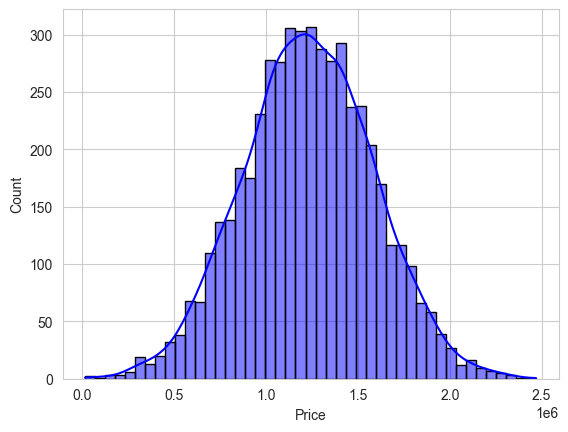

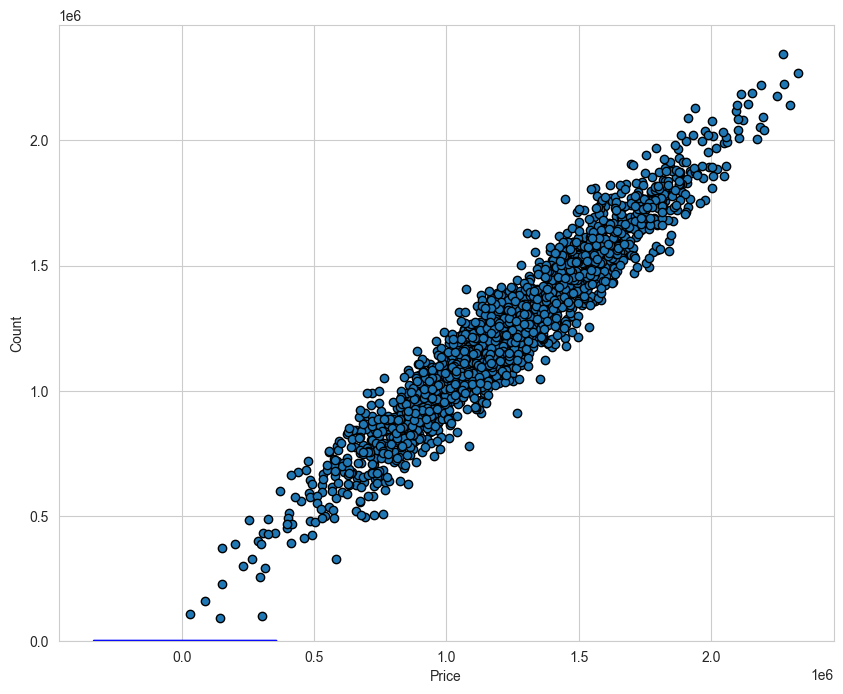

In [98]:
    #imports libraries
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.show()
import matplotlib as mpl
import seaborn as sns
sns.set_style('whitegrid')

    #loading csv data
USA_Housing = pd.read_csv('C:/Users/lucasfongemie/Programming Files/USA_Housing.csv')

#print(USA_Housing.head()) #first look at the data 

#USA_Housing.info() #checking columns and total records

#print(USA_Housing.describe())

    #visualizing the data

#sns.pairplot(USA_Housing) #graphs of all the data

    #distribution of house price
sns.histplot(USA_Housing['Price'], kde=True, color='Blue', edgecolor="black", linewidth=1)

USA_Housing_numeric = USA_Housing.select_dtypes(include='number')
correlation_matrix = USA_Housing_numeric.corr()
#print(correlation_matrix)

    #correlation among all columns
plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

#print(USA_Housing.columns) #getting all coulmn names

    #coulmns as features
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = USA_Housing['Price'] #price, what we are trying to predict

    #trianing the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression #importing linear regression algorithm

lm = LinearRegression() #LinearRegression object

print(lm.fit(X_train, y_train)) #training the data model

#print(lm.intercept_) #desplays the intercept

    #looking at the coefficients 
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df
#print(coeff_df)
    #interpreting coefficients
    #a 1 unit increase in the data is associated with an increase of $coefficient

    #predictions for this model
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions, edgecolor='black')

    #residual plot
sns.histplot((y_test - predictions), bins=50, color='Blue', edgecolor='black', linewidth=1, kde=True)

    #Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error
    #MAE is the easiest to understand, because it's the average error.
    #MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
    #RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
#print('MAE:', metrics.mean_absolute_error(y_test, predictions))
#print('MSE:', metrics.mean_squared_error(y_test, predictions))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.show